In [71]:
import pandas as pd
import numpy as np
import pickle

import seaborn as sns
import missingno as msno

In [27]:
with open('./Dacon/final_total_data(1113)_final.txt', 'rb') as f:
    kb_data = pickle.load(f)

In [29]:
kb_data.head()

,deal_price,deal_year,deal_month,loc_code_x,dong,area,current_floor,total_unit,total_building,max_floor,...,S-LineAir,distance,deal_date,cont_rank,com_year,com_mon,avg_price,sub_num,bldg_age,lv_fg
0,29500,2006,1,11110,19,93,6,72,1,10,...,0,582,2006-01-01,1000,1983,6,315,3,23,0.6
1,28000,2006,4,11110,19,104,3,72,1,10,...,0,582,2006-04-01,1000,1983,6,267,3,23,0.3
2,64560,2006,9,11110,19,156,9,72,1,10,...,0,582,2006-09-01,1000,1983,6,411,3,23,0.9
3,17000,2006,11,11110,19,91,4,72,1,10,...,0,582,2006-11-01,1000,1983,6,185,3,23,0.4
4,43200,2007,1,11110,19,105,7,72,1,10,...,0,582,2007-01-01,1000,1983,6,411,3,24,0.7


In [31]:
kb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973755 entries, 0 to 973811
Data columns (total 46 columns):
deal_price           973755 non-null int64
deal_year            973755 non-null int64
deal_month           973755 non-null int64
loc_code_x           973755 non-null int64
dong                 973755 non-null int64
area                 973755 non-null int64
current_floor        973755 non-null int64
total_unit           973755 non-null int64
total_building       973755 non-null int64
max_floor            973755 non-null int64
min_floor            973755 non-null int64
total_parking        973755 non-null int64
unit_parking         973755 non-null int64
conv_lists           973755 non-null int64
medi_lists           973755 non-null int64
park_lists           973755 non-null int64
road_lists           973755 non-null int64
kindergarten         973755 non-null int64
elementary_school    973755 non-null int64
middle_school        973755 non-null int64
high_school          973755 n

In [44]:
train = pd.read_csv('./Dacon/train.csv')

### 합칠꺼야 건들지마셈

### 1. dacon -> extract seoul

    1.1 address_by_law to str

In [47]:
train['address_by_law'].astype(str)

0          1111017100
1          1111017100
2          1111017400
3          1111017400
4          1111017400
5          1111018700
6          1111018700
7          1114016200
8          1114016200
9          1114016200
10         1114016200
11         1114016200
12         1114016200
13         1114016200
14         1114016200
15         1114016200
16         1114016200
17         1114016200
18         1114016200
19         1114016200
20         1114016200
21         1114016200
22         1114017100
23         1121510300
24         1121510300
25         1121510300
26         1121510300
27         1121510300
28         1121510300
29         1121510300
              ...    
1601428    2623011100
1601429    1154510300
1601430    1150010800
1601431    1126010600
1601432    1126010600
1601433    1162010200
1601434    2620011900
1601435    2671025627
1601436    2671025628
1601437    2671025628
1601438    2644010400
1601439    2644010400
1601440    2644010400
1601441    2644010400
1601442   

In [53]:
train['address_by_law'] = train['address_by_law'].astype(str)

In [56]:
seoul_train = train.loc[:][train['address_by_law'].str.startswith('11')]

In [58]:
seoul_train.head()

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price
0,0,5584,1,200601,11~20,1999,47.43,6,37.585965,127.000231,...,4.0,individual,gas,91120,65.63,46,1.0,1.0,corridor,215000000
1,1,5584,1,200601,11~20,1999,44.37,8,37.585965,127.000231,...,4.0,individual,gas,91119,61.39,10,2.0,1.0,corridor,200000000
2,2,5059,1,200601,11~20,1992,54.70,8,37.580511,127.014016,...,9.0,individual,gas,8430,72.36,201,2.0,1.0,corridor,168000000
3,3,2816,1,200601,11~20,1993,64.66,11,37.580324,127.011788,...,11.0,individual,gas,5839,87.30,284,2.0,1.0,corridor,165000000
4,4,2816,1,200601,11~20,1993,106.62,7,37.580324,127.011788,...,11.0,individual,gas,5836,127.74,112,4.0,2.0,stairway,280000000


    1.2 Find common columns

In [85]:
seoul_train.loc[:][seoul_train['key'] == 1364011]

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price
1364000,1364011,18355,1,201701,21~31,2009,26.08,5,37.577184,127.035723,...,14.0,individual,gas,94596,37.88,77,1.0,1.0,stairway,225000000


In [74]:
seoul_train_common[:][seoul_train_common['tallest_building_in_sites'].isnull()]

,transaction_year_month,year_of_completion,tallest_building_in_sites,lowest_building_in_sites,floor
1364011,201701,1997,NaN,NaN,5
1364012,201701,1997,NaN,NaN,13
1376623,201703,1997,NaN,NaN,22
1384989,201703,1997,NaN,NaN,11
1410300,201705,1997,NaN,NaN,15
1448208,201707,1997,NaN,NaN,1
1448209,201707,1997,NaN,NaN,1
1555578,201804,1997,NaN,NaN,21
1560091,201805,1997,NaN,NaN,22


In [70]:


# seoul_train_common = seoul_train[common_col]
# seoul_train_common['tallest_building_in_sites'] = seoul_train_common['tallest_building_in_sites'].astype(int)
# seoul_train_common['lowest_building_in_sites'] = seoul_train_common['lowest_building_in_sites'].astype(int)
# seoul_train_common['floor'] = seoul_train_common['floor'].astype(int)
# # seoul_train_common

ValueError: Cannot convert non-finite values (NA or inf) to integer

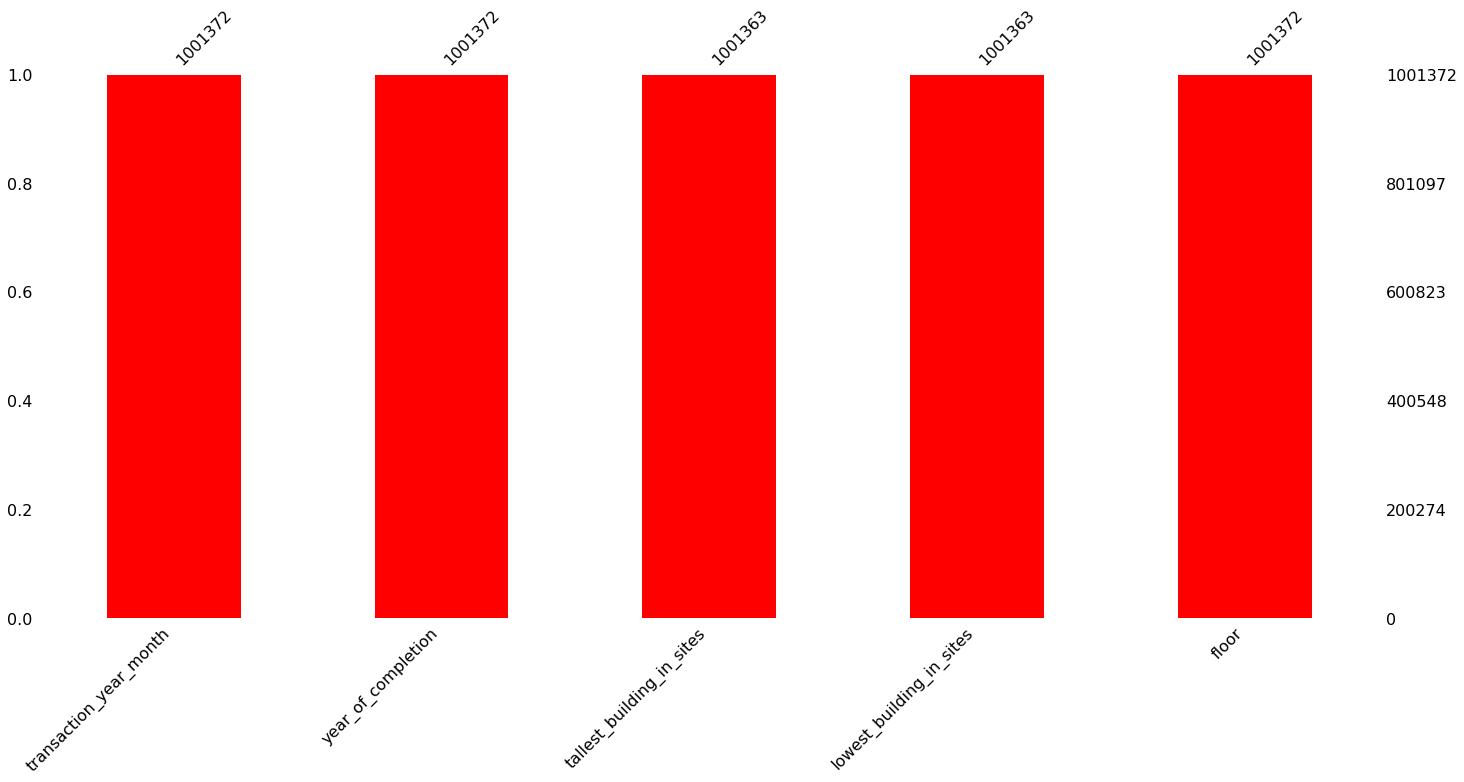

In [73]:
msno.bar(seoul_train_common,color='r')

In [64]:
# lat = 37.376385
# lng = 126.635564
# addr -> lat, lng die
print(len(kb_data))
print(len(seoul_train))

common_col = ['transaction_year_month', 'year_of_completion', 'tallest_building_in_sites', 'lowest_building_in_sites', 'floor']



973755
1001372


In [9]:
subway = pd.read_csv('./Dacon/Subways.csv')

ㅇㄹ

#### 지하철 5번 빠짐, 동대문역 -> #1111017400

In [25]:
cond = subway['address_by_law'].isnull()
column_name = 'address_by_law'
subway.loc[cond, column_name] = 1111017400

,station_id,latitude,longitude,subway_line,address_by_law
0,1,37.555729,126.972145,"1,4,KJ,AP",1.114012e+09
1,2,37.565624,126.976936,"1,2",1.114017e+09
2,3,37.570169,126.983099,1,1.111013e+09
3,4,37.571570,126.991895,"1,3,5",1.111016e+09
4,5,37.570988,127.001921,1,1.111016e+09
5,6,37.571256,127.009080,"1,4",1.111017e+09
